In [112]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

In [113]:
dataset= pd.read_csv('data\Bank-Churn-data.csv')
x=dataset.iloc[:, 3:-1].values
y=dataset.iloc[:, -1].values
print(x)
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [114]:
LE=LabelEncoder()
x[:, 2]=LE.fit_transform(x[:, 2])
print(x[0])
x[:, 2]=LE.fit_transform(x[:, 2])
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x[0])

[619 'France' 0 42 2 0.0 1 1 1 101348.88]
[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]


### Baseline model

In [115]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size = 0.33, random_state = 0)

In [116]:
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)
X_validation=mx.transform(X_validation)

In [117]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))   
ann.compile(optimizer='FTRL',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,batch_size=16,epochs=50)

Epoch 1/50
438/438 [==============================] - 2s 2ms/step - loss: 0.6903 - accuracy: 0.6632
Epoch 2/50
438/438 [==============================] - 1s 2ms/step - loss: 0.6791 - accuracy: 0.7917
Epoch 3/50
438/438 [==============================] - 1s 2ms/step - loss: 0.6709 - accuracy: 0.8013
Epoch 4/50
438/438 [==============================] - 1s 2ms/step - loss: 0.6630 - accuracy: 0.7940
Epoch 5/50
438/438 [==============================] - 1s 2ms/step - loss: 0.6535 - accuracy: 0.7936
Epoch 6/50
438/438 [==============================] - 1s 2ms/step - loss: 0.6429 - accuracy: 0.7963: 0s - loss: 0.6430 - accuracy: 0.79
Epoch 7/50
438/438 [==============================] - 1s 2ms/step - loss: 0.6314 - accuracy: 0.8002
Epoch 8/50
438/438 [==============================] - 1s 2ms/step - loss: 0.6213 - accuracy: 0.7990
Epoch 9/50
438/438 [==============================] - 1s 2ms/step - loss: 0.6135 - accuracy: 0.7902
Epoch 10/50
438/438 [==============================] - 1s 2ms/st

In [118]:
filename = 'data/baseline_model.h5'
ann.save(filename)

In [119]:
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1591
           1       0.00      0.00      0.00       419

    accuracy                           0.79      2010
   macro avg       0.40      0.50      0.44      2010
weighted avg       0.63      0.79      0.70      2010



C:\python3.8\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python3.8\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python3.8\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBoost classifier

In [120]:
from xgboost import XGBClassifier
from sklearn import metrics
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)
print(classification_report(y_test, preds))

C:\python3.8\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:42:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1591
           1       0.75      0.53      0.62       419

    accuracy                           0.86      2010
   macro avg       0.82      0.74      0.77      2010
weighted avg       0.86      0.86      0.86      2010



In [121]:
dataset= pd.read_csv('data\Bank-Churn-data.csv')
dataset.head()
x=dataset.iloc[:, 3:-1].values
y=dataset.iloc[:, -1].values
LE=LabelEncoder()
x[:, 2]=LE.fit_transform(x[:, 2])
x[:, 2]=LE.fit_transform(x[:, 2])
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x=np.array(ct.fit_transform(x))
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [122]:
#Remove RowNumber from the data set
df2 = dataset.iloc[:,1:]
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,...,0,0,0,0,0,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,...,0,0,0,0,0,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,...,0,0,0,0,0,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,...,0,0,0,0,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,...,0,0,0,0,0,0,0,1,1,0


## Data Exploration

 ### Senior Citizens : 
 Adding a new feature to the dataset.
 We are considering people above 60 years as senior Citizens

In [123]:
df2['SeniorCitizen'] =  [1 if x > 60 else 0 for x in df2['Age']]
column_names = list(df2.columns.values)
print(column_names)
column_names[-2], column_names[-1] = column_names[-1], column_names[-2]
df2=df2.reindex(columns=column_names)
df2.head()
x=df2.iloc[:, 3:-1].values
y=df2.iloc[:, -1].values
LE=LabelEncoder()
x[:, 2]=LE.fit_transform(x[:, 2])
x[:, 2]=LE.fit_transform(x[:, 2])
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x=np.array(ct.fit_transform(x))
df2.isnull().sum()
df2 = df2.iloc[:,1:]
df_dummies = pd.get_dummies(df2)
df_dummies.head()

['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'SeniorCitizen']


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,SeniorCitizen,Exited,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,1,...,0,0,0,0,0,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,...,0,0,0,0,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,1,...,0,0,0,0,0,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,0,0,0,0,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,0,0,0,0,0,0,0,1,1,0


Text(0.5, 1.0, '% of Senior Citizens')

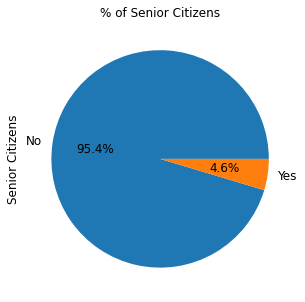

In [124]:
ax = (df2['SeniorCitizen'].value_counts()*100.0 /len(df2))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

<AxesSubplot:>

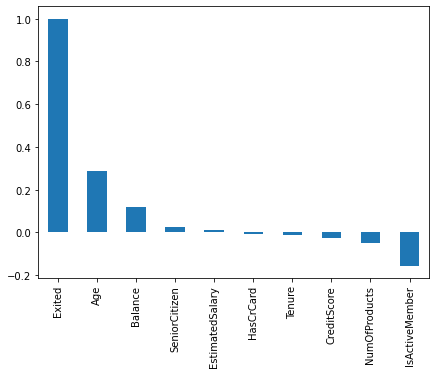

In [125]:
plt.figure(figsize=(7,5))
df2.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

Age and Balance seem to be positively correlated with churn.

Interestingly, rest all the features seem to be negatively related to churn.

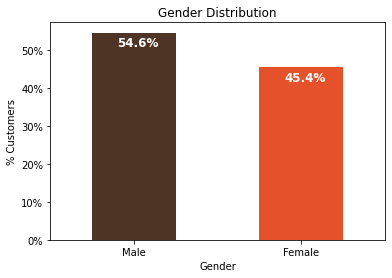

In [126]:
colors = ['#4D3425','#E4512B']
ax = (df2['Gender'].value_counts()*100.0 /len(df2)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

C:\python3.8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

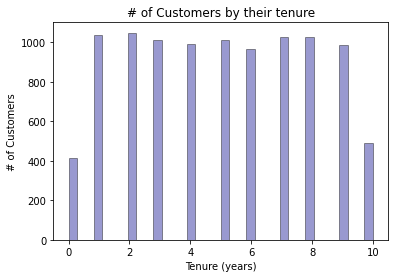

In [127]:
import seaborn as sns
ax = sns.distplot(df2['Tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (years)')
ax.set_title('# of Customers by their tenure')

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

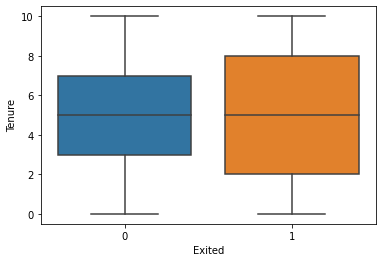

In [128]:
sns.boxplot(x = df2.Exited, y = df2.Tenure)

Churn vs Tenure: As we can see form the above plot, the customers who do not churn, they tend to stay for a lesser tenure with the Bank.

Text(0.5, 1.0, '# of Customers by Number of products')

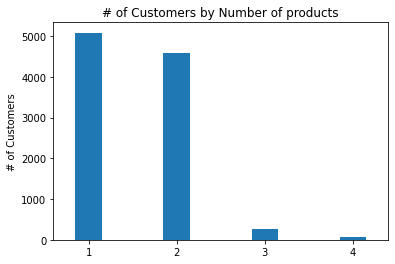

In [129]:
ax = df2['NumOfProducts'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Number of products')

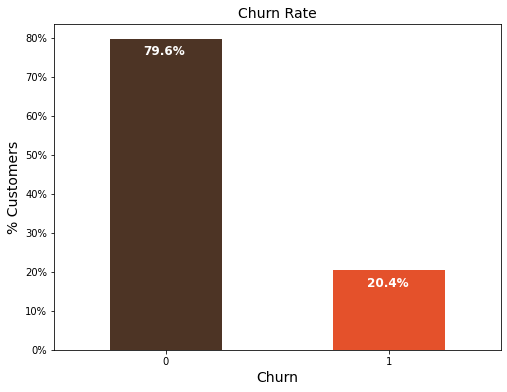

In [130]:
colors = ['#4D3425','#E4512B']
ax = (df2['Exited'].value_counts()*100.0 /len(df2)).plot(kind='bar',stacked = True,rot = 0,color = colors,figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, 'Distribution of Credit Score by churn')

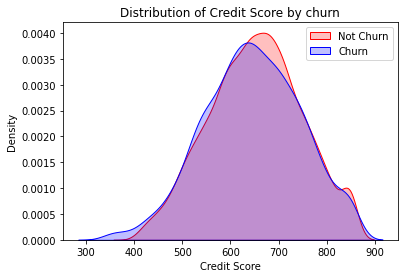

In [131]:
ax = sns.kdeplot(df2.CreditScore[(df2["Exited"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df2.CreditScore[(df2["Exited"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Credit Score')
ax.set_title('Distribution of Credit Score by churn')

Text(0.5, 1.0, 'Distribution of Balance by churn')

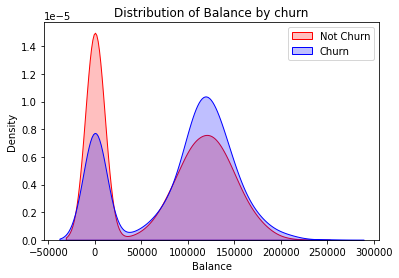

In [132]:
ax = sns.kdeplot(df2.Balance[(df2["Exited"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df2.Balance[(df2["Exited"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Balance')
ax.set_title('Distribution of Balance by churn')

Text(0.5, 1.0, 'Distribution of Estimated Salary by churn')

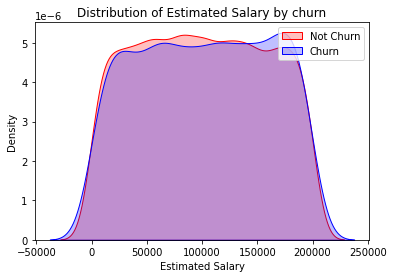

In [133]:
ax = sns.kdeplot(df2.EstimatedSalary[(df2["Exited"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(df2.EstimatedSalary[(df2["Exited"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Estimated Salary')
ax.set_title('Distribution of Estimated Salary by churn')

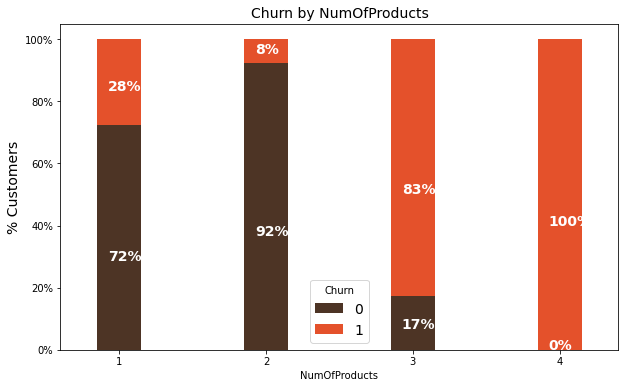

In [134]:
colors = ['#4D3425','#E4512B']
prod_churn = df2.groupby(['NumOfProducts','Exited']).size().unstack()

ax = (prod_churn.T*100.0 / prod_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by NumOfProducts',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Churn by Number of products :  Similar to what we saw in the correlation plot, the customers who have a more products have a very high churn rate.

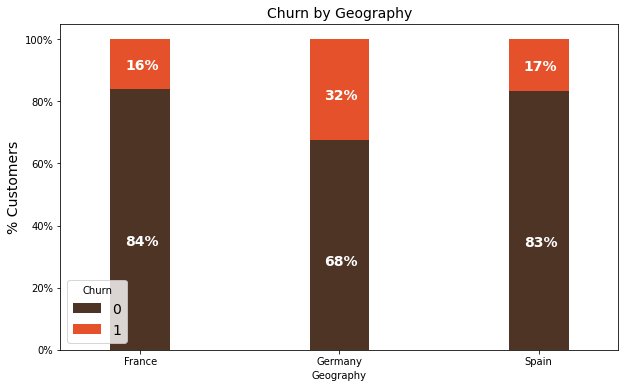

In [135]:
colors = ['#4D3425','#E4512B']
prod_churn = df2.groupby(['Geography','Exited']).size().unstack()

ax = (prod_churn.T*100.0 / prod_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Geography',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [136]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Exited'].values
X = df_dummies.drop(columns = ['Exited'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size = 0.33, random_state = 0)

In [137]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8199004975124378


C:\python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7885


<AxesSubplot:>

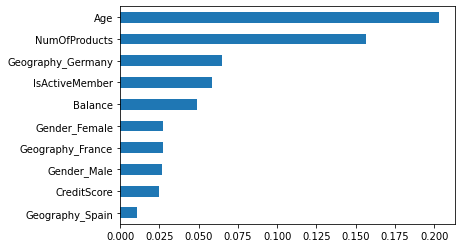

In [139]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Artificial neural network

In [140]:
x=dataset.iloc[:, 3:-1].values
y=dataset.iloc[:, -1].values
LE=LabelEncoder()
x[:, 2]=LE.fit_transform(x[:, 2])
print(x[5])
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x[5])
print(y[5])

[645 'Spain' 1 44 8 113755.78 2 1 0 149756.71]
[0.0 0.0 1.0 645 1 44 8 113755.78 2 1 0 149756.71]
1


In [141]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size = 0.33, random_state = 0)

In [142]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_validation=sc.transform(X_validation)

In [143]:
def leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.01)

In [144]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation=leaky_relu))
ann.add(tf.keras.layers.Dense(units=1,activation=leaky_relu))   
ann.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,batch_size=16,epochs=200)

Epoch 1/200
438/438 [==============================] - 2s 2ms/step - loss: 1.6537 - accuracy: 0.6617: 0s - loss: 1.8095 - ac
Epoch 2/200
438/438 [==============================] - 1s 2ms/step - loss: 0.6471 - accuracy: 0.7583: 0s - loss: 0.6590 - accura
Epoch 3/200
438/438 [==============================] - 1s 2ms/step - loss: 0.5457 - accuracy: 0.7836
Epoch 4/200
438/438 [==============================] - 1s 2ms/step - loss: 0.4909 - accuracy: 0.8065
Epoch 5/200
438/438 [==============================] - 1s 2ms/step - loss: 0.4812 - accuracy: 0.8093
Epoch 6/200
438/438 [==============================] - 1s 2ms/step - loss: 0.4728 - accuracy: 0.8184
Epoch 7/200
438/438 [==============================] - 1s 2ms/step - loss: 0.4339 - accuracy: 0.8175
Epoch 8/200
438/438 [==============================] - 1s 2ms/step - loss: 0.4540 - accuracy: 0.8211
Epoch 9/200
438/438 [==============================] - 1s 2ms/step - loss: 0.4316 - accuracy: 0.8265
Epoch 10/200
438/438 [=================

In [145]:
filename = 'data/Updated_model.h5'
ann.save(filename)

In [149]:
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1591
           1       0.76      0.51      0.61       419

    accuracy                           0.86      2010
   macro avg       0.82      0.73      0.76      2010
weighted avg       0.86      0.86      0.85      2010



In [148]:
y_val_pred=ann.predict(X_validation)
y_val_pred=(y_val_pred>0.5)
print(classification_report(y_validation, y_val_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       788
           1       0.71      0.49      0.57       202

    accuracy                           0.85       990
   macro avg       0.79      0.72      0.74       990
weighted avg       0.84      0.85      0.84       990

